In [69]:
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

1. CREATE MAZE

In [72]:
class Maze:
    def __init__(self, grid):
        # Initialize the maze and its initial attributes
        self.grid = grid  # Maze grid
        self.walls = []  # List of walls
        self.start_position = None  # Start position
        self.end_position = None  # End position
        self.path_taken = []  # Store the path taken by the agent
        self.setup()  # Setup the maze

    def setup(self):
        # Set up maze attributes based on the grid
        for y in range(len(self.grid)):
            for x in range(len(self.grid[y])):
                cell = self.grid[y][x]
                if cell == 1:  # If the cell is a wall
                    self.walls.append((x, y))  # Add the wall position to the walls list
                elif cell == "s":  # If the cell is the start position
                    self.start_position = (x, y)  # Set the start position
                elif cell == "g":  # If the cell is the goal position
                    self.end_position = (x, y)  # Set the end position

    def draw(self, agent_position):
        plt.clf()  # Clear the previous grid
        # Draw the maze and the agent's position
        for y in range(len(self.grid)):
            for x in range(len(self.grid[y])):
                cell = self.grid[y][x]
                if cell == 1:  # Cell is a wall
                    plt.fill([x, x + 1, x + 1, x], 
                             [len(self.grid) - y - 1, len(self.grid) - y - 1, len(self.grid) - y, len(self.grid) - y], color='black')
                elif cell == "s":  # Cell is the start position
                    plt.fill([x, x + 1, x + 1, x], 
                             [len(self.grid) - y - 1, len(self.grid) - y - 1, len(self.grid) - y, len(self.grid) - y], color='green')
                elif cell == "g":  # Cell is the goal position
                    plt.fill([x, x + 1, x + 1, x], 
                             [len(self.grid) - y - 1, len(self.grid) - y - 1, len(self.grid) - y, len(self.grid) - y], color='red')
        
        # Iterate through the path taken to color it
        for position in self.path_taken:
            # Determine the coordinates (x, y) of the four corners of the cell the agent has visited
            plt.fill([position[0], position[0] + 1, position[0] + 1, position[0]], 
                     [len(self.grid) - position[1] - 1, len(self.grid) - position[1] - 1, len(self.grid) - position[1], len(self.grid) - position[1]], color='orange')
    
        # Determine the coordinates (x, y) of the four corners of the current cell to mark the agent's position
        plt.fill([agent_position[0], agent_position[0] + 1, agent_position[0] + 1, agent_position[0]], 
                 [len(self.grid) - agent_position[1] - 1, len(self.grid) - agent_position[1] - 1, len(self.grid) - agent_position[1], len(self.grid) - agent_position[1]], color='blue')
        
        # Ensure the aspect ratio of the axes is equal
        plt.axis('equal')
        # Hide the x and y axis ticks
        plt.axis('off')
        # Render the plot
        plt.draw()
        # Pause for a short time
        plt.pause(0.0005)
        
    # Method to update the path taken
    def update_path_taken(self, position):
        self.path_taken.append(position)


2. CREATE CLASS PROBLEM

In [75]:
class OnlineSearchProblem:
    def __init__(self, initial, goal, maze):
        # Initialize the online search problem 
        # with the initial state, goal state, and maze
        self.initial = initial  # Initial state
        self.goal = goal  # Goal state
        self.maze = maze  # Maze
        self.path = []

    def output(self, state, action):
        # Return the new state after performing an action from a specific state
        x, y = state  # Coordinates of the state
        dx, dy = action  # Action to be performed
        new_x, new_y = x + dx, y + dy  # New coordinates after performing the action
        return (new_x, new_y)  # Return the new state

    def h(self, state):
        # Heuristic function h(state): Estimate the distance from the state to the goal state
        return abs(state[0] - self.goal[0]) + abs(state[1] - self.goal[1])

    def action_cost(self, s, a, s1):
        # Return the cost of action a from state s to state s1
        return 1

    def goal_test(self, state):
        # Check if a state is the goal state
        return state == self.goal  # Return True if the state is the goal state, otherwise False


3. CREATE CLASS AGENT LRTASTAR

In [95]:
class LRTAStarAgent:
    def __init__(self, problem):
        # Initialize LRTA* Agent 
        self.problem = problem  
        # self.result = {} stores the result when performing action a in state s
        self.H = {}  # Dictionary to store h(s) values for each state s
        self.s = None  # Previous state
        self.a = None  # Previous action

    def __call__(self, s1):
        if self.problem.goal_test(s1):
            # Check if the reached state is the goal state
            self.a = None  
            return self.a
        else:
            if s1 not in self.H:
                # If the heuristic value for the new state has not been calculated
                self.H[s1] = self.problem.h(s1)  # Calculate the heuristic value for the new state

            if self.s is not None:
                # Update the heuristic value of the previous state
                self.H[self.s] = min(self.LRTA_cost(self.s, b, self.problem.output(self.s, b), self.H) for b in self.actions(self.s))

            # Choose the best action from the current state s1
            self.a = min(self.actions(s1), key=lambda b: self.LRTA_cost(s1, b, self.problem.output(s1, b), self.H))
            
            print("State s:", self.s, " Action a:", self.a, "\n New state s':", s1)
            self.s = s1  # Update the current state for the next call
            
            return self.a  # Return the selected action

    def LRTA_cost(self, s, a, s1, H):
        # Calculate the cost of the action from state s to s1 based on the heuristic value H

        if s1 is None:
            # If the next state is None 
            return self.problem.h(s)  # Return the heuristic value of the current state
        else:
            try:
                # Get the heuristic value of state s1 from dictionary H
                return self.problem.action_cost(s, a, s1) + H[s1]
            except KeyError:
                # If the heuristic value of s1 cannot be retrieved from H (not calculated yet)
                # Usually because h(s1) needs to be retrieved but not yet added to H
                # self.problem.h(s1): Add new heuristic value and return the action cost
                return self.problem.action_cost(s, a, s1) + self.problem.h(s1)  
            
    def actions(self, state):
        x, y = state
        possible_actions = []
        for dx, dy in [(0, -1), (0, 1), (1, 0), (-1, 0)]:
            new_x, new_y = x + dx, y + dy
            if (new_x, new_y) not in self.problem.maze.walls:
                possible_actions.append((dx, dy))
        return possible_actions


4. CREATE CLASS AGENT ONLINE DFS

In [98]:
class OnlineDFSAgent:

    def __init__(self, problem):
        self.problem = problem  # Initialize the problem that the agent is trying to solve
        self.s = None  # Initialize the previous state
        self.a = None  # Initialize the previous action
        self.untried = dict()  # Create a dictionary to store untried actions for each state
        self.unbacktracked = dict()  # Create a dictionary to store states that haven't been backtracked
        self.result = {}  # Create a dictionary to store the results of performed actions

    def __call__(self, percept):
        s1 = self.update_state(percept)  # Update the current state based on received information
        if s1 not in self.problem.path:
            self.problem.path.append(s1)  # Add the current state to the path
        if self.problem.goal_test(s1):  # Check if the goal has been reached
            self.a = None  # No action needed if the goal state is reached
        else:
            if s1 not in self.untried.keys():  # Check if the current state is a new state
                self.untried[s1] = self.actions(s1)
            if self.s is not None:  # Check if there is a previous state
                if s1 not in self.result or s1 != self.result[(self.s, self.a)]:
                    self.result[(self.s, self.a)] = s1  # Store the result of the action performed from the previous state
                if s1 not in self.unbacktracked.keys():  # Check if there is a state that hasn't been backtracked
                    self.unbacktracked[s1] = []  # Initialize the unbacktracked state for the current state
                if self.s in self.result.values() or self.s is self.problem.initial:
                    if self.s in self.untried.keys():  # The state added to unbacktracked must meet the condition: not already backtracked
                        self.unbacktracked[s1].insert(0, self.s)  # Add the previous state to the unbacktracked list

            if len(self.untried[s1]) == 0:  # Check if there are any untried actions for the current state
                if len(self.unbacktracked[s1]) == 0:  # Check if there are any unbacktracked states for the current state
                    self.a = None  # No action if both are empty
                else:
                    unbacktracked_pop = self.unbacktracked[s1].pop(0)  # Get the next unbacktracked state
                    if s1 in self.problem.path:
                        self.problem.path.remove(s1)  # Remove the state if it already exists (i.e., being backtracked)
                    self.untried.pop(s1, None)  # Mark the current state as new due to backtracking
                    x, y = s1
                    for dx, dy in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
                        new_x, new_y = x + dx, y + dy
                        b = (new_x, new_y)
                        if b == unbacktracked_pop:
                            self.a = (dx, dy)  # Choose the action to reach the unbacktracked state
                            break
            else:
                self.a = self.untried[s1].pop(0)  # Choose the next untried action for the current state

        self.s = s1  # Update the current state
        return self.a  # Return the chosen action

    def update_state(self, percept):
        return percept  # Update the current state based on received information

    def actions(self, state):
        x, y = state
        possible_actions = []
        for dx, dy in [(0, -1), (0, 1), (1, 0), (-1, 0)]:
            new_x, new_y = x + dx, y + dy
            if (new_x, new_y) not in self.problem.maze.walls and (new_x, new_y) not in self.untried.keys():
                possible_actions.append((dx, dy))
        return possible_actions  # Return the list of possible actions from the current state


5. CREATE GRID MAZE

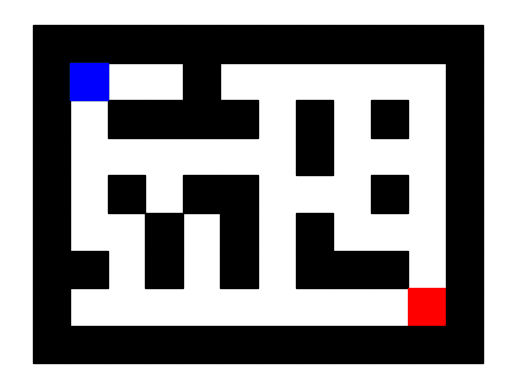

In [112]:
#create grid maze

#ex1
grid = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1,'s', 0, 0, 1,0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1],
        [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0,'g',1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

#ex2
# grid = [[1, 1, 1, 1, 1, 1, 1],
#         [1, 0, 0, 0, 0,'g', 1],
#         [1, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 1],
#         [1,'s',0, 0, 0, 0, 1],
#         [1, 1, 1, 1, 1, 1, 1]]


# ex3: Dead end
# grid = [[1, 1, 1, 1, 1, 1, 1],
#         [1, 0, 0, 0, 1,'g', 1],
#         [1, 0, 0, 0, 1, 1, 1],
#         [1, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 1],
#         [1,'s',0, 0, 0, 0, 1],
#         [1, 1, 1, 1, 1, 1, 1]]

maze = Maze(grid)
#draw maze
maze.draw(maze.start_position)

6. CREATE TWO AGENT ONLINE DFS AND LRTASTAR

In [115]:
initial_state = maze.start_position  # Starting position
goal_state = maze.end_position  # Goal position

# Create the problem
problem = OnlineSearchProblem(initial_state, goal_state, maze)

# LRTA* agent
lrta_agent = LRTAStarAgent(problem)

# Online DFS agent
dfs_agent = OnlineDFSAgent(problem)


7. MAZE PATHFINDING AGENTS

State s: None  Action a: (0, 1) 
 New state s': (1, 1)


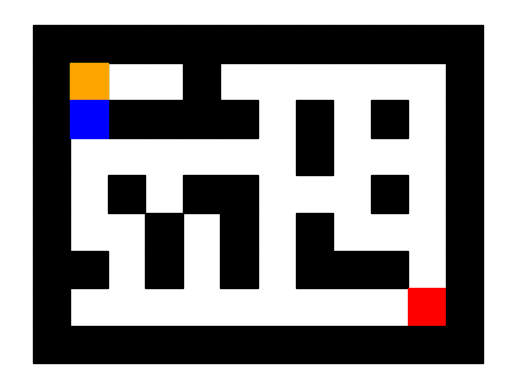

State s: (1, 1)  Action a: (0, 1) 
 New state s': (1, 2)


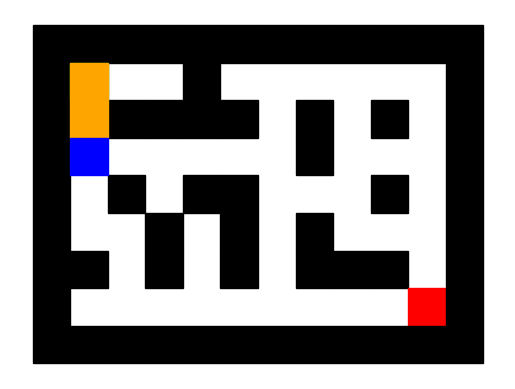

State s: (1, 2)  Action a: (0, 1) 
 New state s': (1, 3)


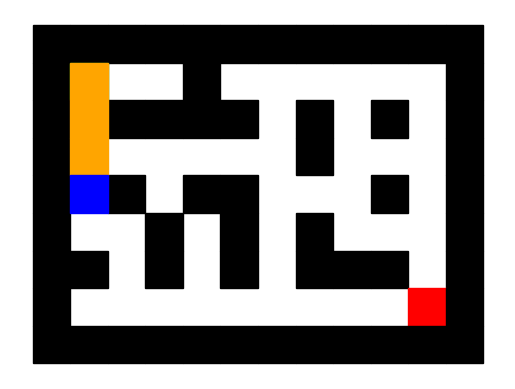

State s: (1, 3)  Action a: (0, 1) 
 New state s': (1, 4)


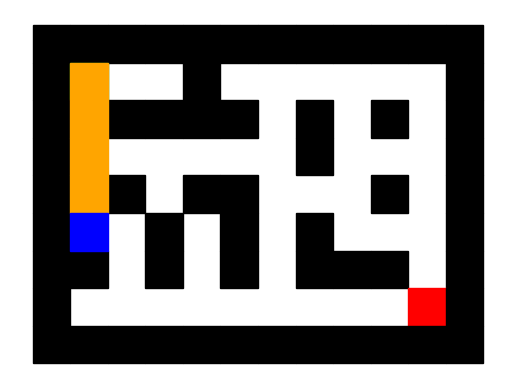

State s: (1, 4)  Action a: (1, 0) 
 New state s': (1, 5)


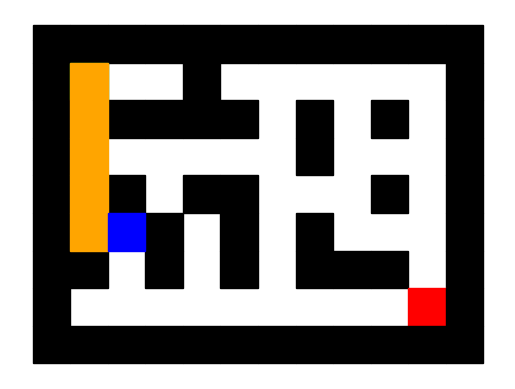

State s: (1, 5)  Action a: (0, 1) 
 New state s': (2, 5)


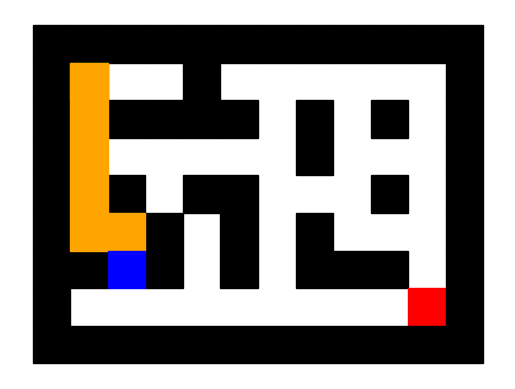

State s: (2, 5)  Action a: (0, 1) 
 New state s': (2, 6)


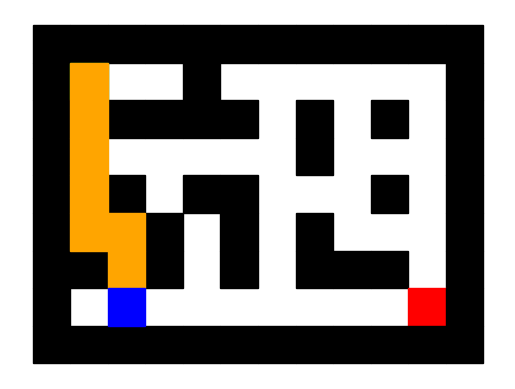

State s: (2, 6)  Action a: (1, 0) 
 New state s': (2, 7)


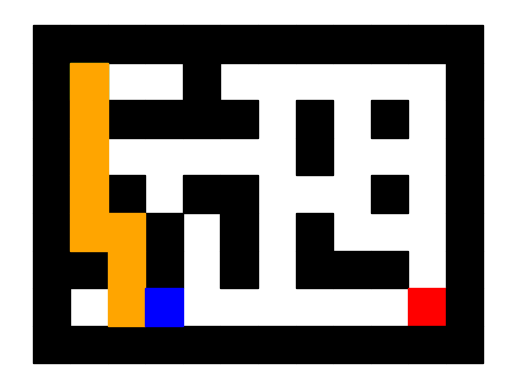

State s: (2, 7)  Action a: (1, 0) 
 New state s': (3, 7)


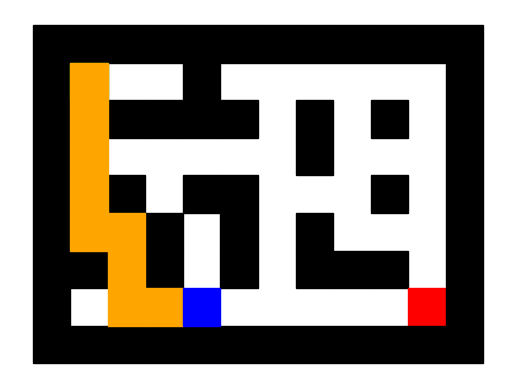

State s: (3, 7)  Action a: (1, 0) 
 New state s': (4, 7)


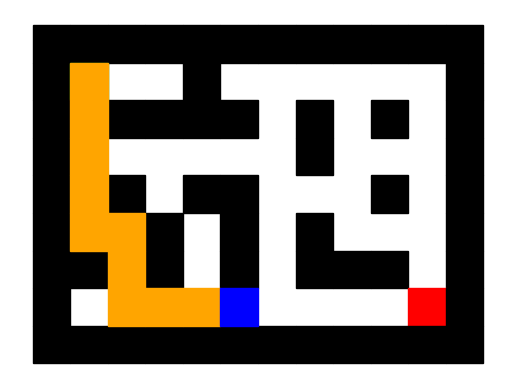

State s: (4, 7)  Action a: (1, 0) 
 New state s': (5, 7)


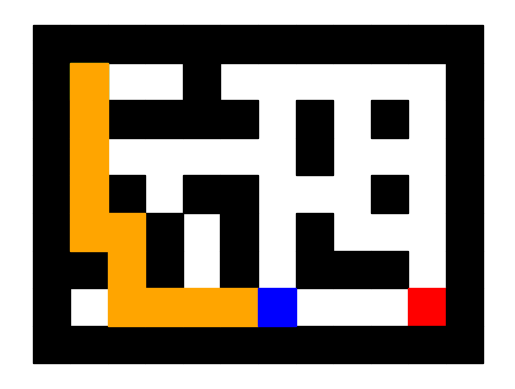

State s: (5, 7)  Action a: (1, 0) 
 New state s': (6, 7)


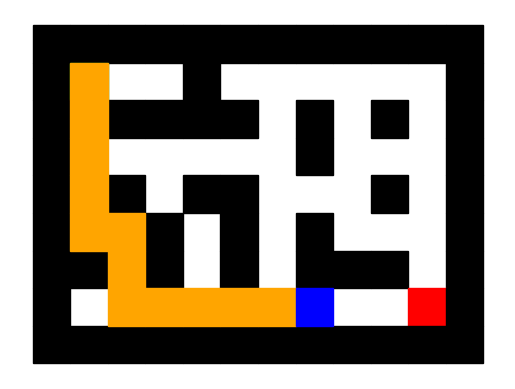

State s: (6, 7)  Action a: (1, 0) 
 New state s': (7, 7)


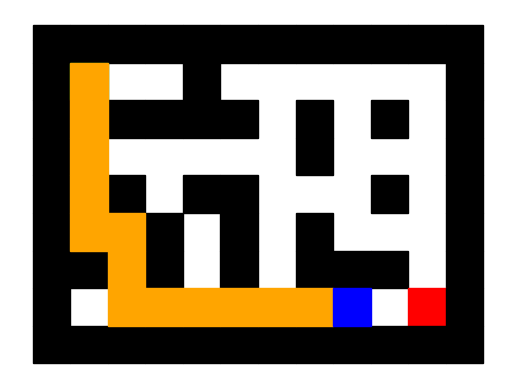

State s: (7, 7)  Action a: (1, 0) 
 New state s': (8, 7)


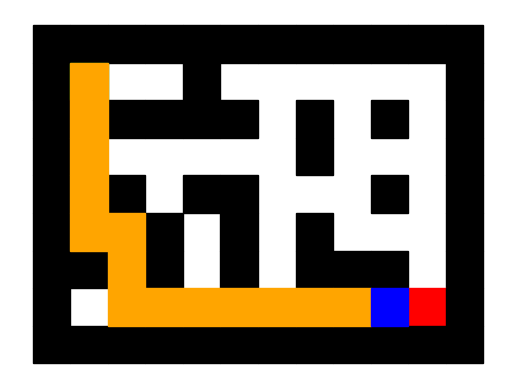

State s: (8, 7)  Action a: (1, 0) 
 New state s': (9, 7)


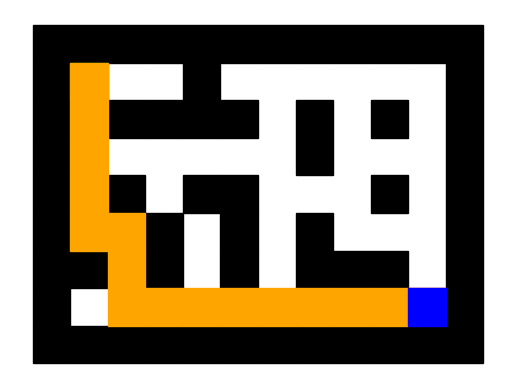

total step 15


In [118]:
current_state = initial_state
# Count the number of steps
i = int(0)
while current_state != goal_state:
    i+=1
#     clear_output(wait=True)
    
    # LRTAStar agent runs and Draws the path taken by the LRTAStar agent
    action = lrta_agent(current_state)
    maze.update_path_taken(current_state)

    # Online DFS agent runs
    # action = dfs_agent(current_state)

    current_state = problem.output(current_state, action)
    maze.draw(current_state)

print("total step",i)


8. PRINT THE PATH FROM START TO FINISH OF THE ONLINE DFS AGENT

In [121]:
# Print the path of the Online DFS agent - (Excluding backtracked cells)
for s in problem.path:
    
    clear_output(wait = True)
    maze.update_path_taken(s)
    maze.draw(s)
